In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [2]:
data = pd.read_csv('./dataset/kdd_cup99_10_percent.csv')
labels = ['dos','normal','prode','r2l','u2r']

In [3]:
# 统计每个类别的样本数
task_counts = data['attack_type'].value_counts()

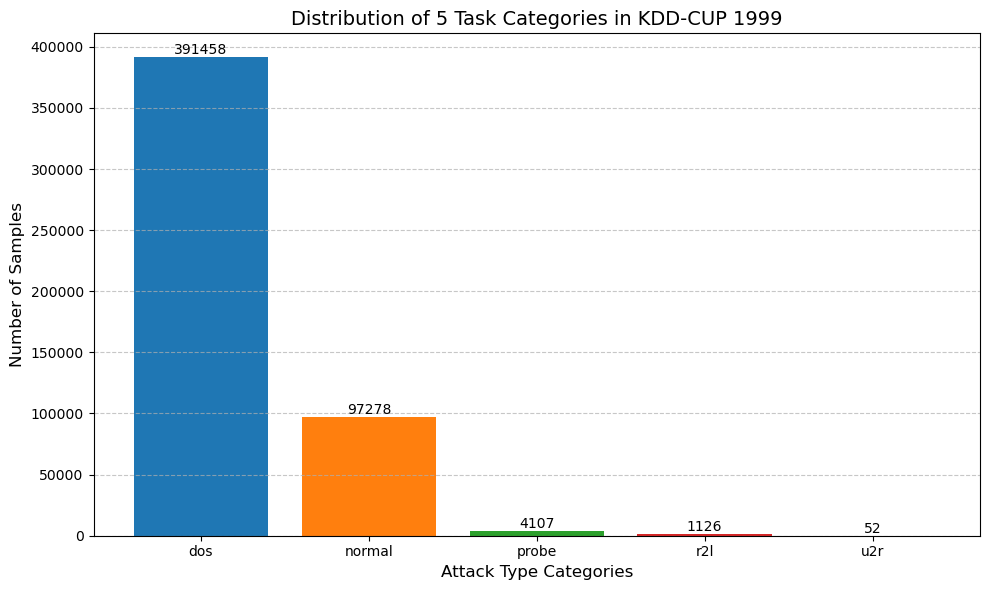

In [4]:

# 绘制柱状图
plt.figure(figsize=(10, 6))
bars = plt.bar(task_counts.index, task_counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# 添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
             ha='center', va='bottom', fontsize=10)

# 添加标题和坐标轴标签
plt.title('Distribution of 5 Task Categories in KDD-CUP 1999', fontsize=14)
plt.xlabel('Attack Type Categories', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)

# 显示网格线（可选）
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.tight_layout()
plt.show()

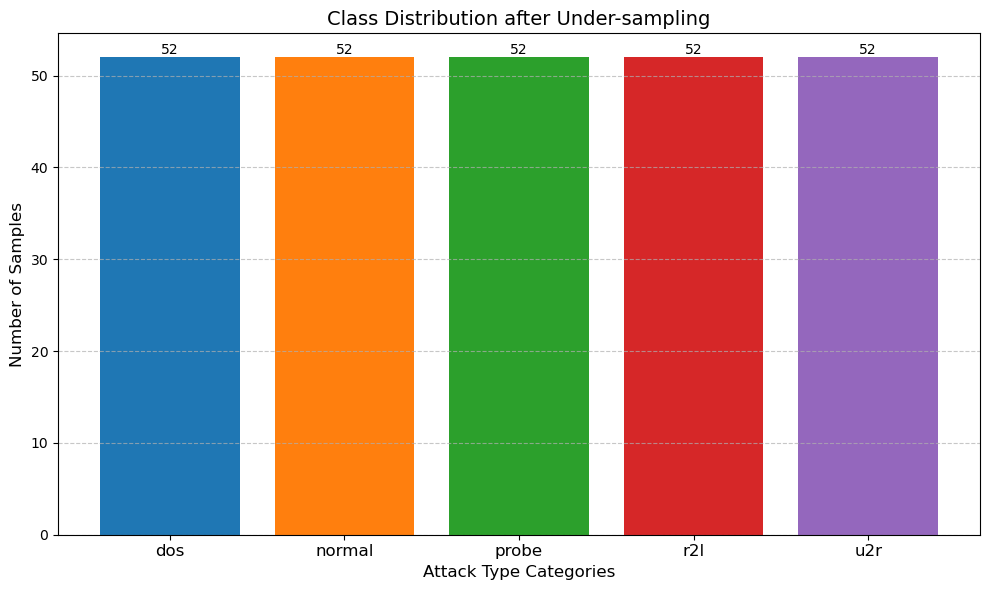

In [5]:
# 分离特征和标签
X = data.drop(['label','label_digit','attack_type','attack_type_digit','service'], axis=1)# 特征
Y = data[['attack_type_digit']]             # 标签

# ------------------ 方法1：欠采样（Under-sampling） ------------------
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X, Y)
# 原始类别标签映射
attack_type_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r']

# 绘制柱状图
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(attack_type_labels)), y_under.value_counts(), 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# 设置 X 轴标签
plt.xticks(range(len(attack_type_labels)), attack_type_labels, fontsize=12)

# 添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

# 添加标题和坐标轴标签
plt.title("Class Distribution after Under-sampling", fontsize=14)
plt.xlabel("Attack Type Categories", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)

# 显示网格线（可选）
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.tight_layout()
plt.show()


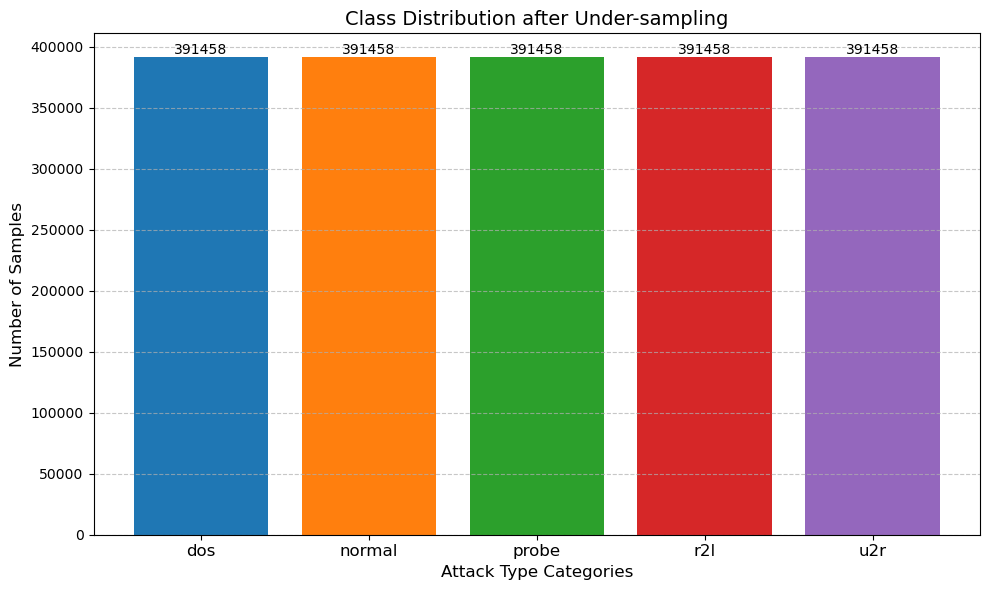

In [6]:
# ------------------ 方法2：过采样（SMOTE） ------------------
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, Y)

# 原始类别标签映射
attack_type_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r']

# 绘制柱状图
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(attack_type_labels)), y_smote.value_counts(), 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# 设置 X 轴标签
plt.xticks(range(len(attack_type_labels)), attack_type_labels, fontsize=12)

# 添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

# 添加标题和坐标轴标签
plt.title("Class Distribution after Under-sampling", fontsize=14)
plt.xlabel("Attack Type Categories", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)

# 显示网格线（可选）
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.tight_layout()
plt.show()

In [7]:
# 保存欠采样后的数据集
under_sampled_data = pd.concat([pd.DataFrame(X_under, columns=X.columns), 
                                pd.DataFrame(y_under, columns=['attack_type_digit'])], axis=1)
under_sampled_data.to_csv('./dataset/under_sampled_dataset.csv', index=False)
print("欠采样后的数据集已保存为 'under_sampled_dataset.csv'")
# 保存过采样后的数据集
smote_sampled_data = pd.concat([pd.DataFrame(X_smote, columns=X.columns), 
                                pd.DataFrame(y_smote, columns=['attack_type_digit'])], axis=1)
smote_sampled_data.to_csv('./dataset/smote_sampled_dataset.csv', index=False)
print("过采样后的数据集已保存为 'smote_sampled_dataset.csv'")

欠采样后的数据集已保存为 'under_sampled_dataset.csv'
过采样后的数据集已保存为 'smote_sampled_dataset.csv'


采样后的类别分布：
attack_type_digit
0    97278
1    97278
2    97278
3    97278
4    97278
Name: count, dtype: int64
混合采样后的数据集已保存为 'combined_sampled_dataset.csv'


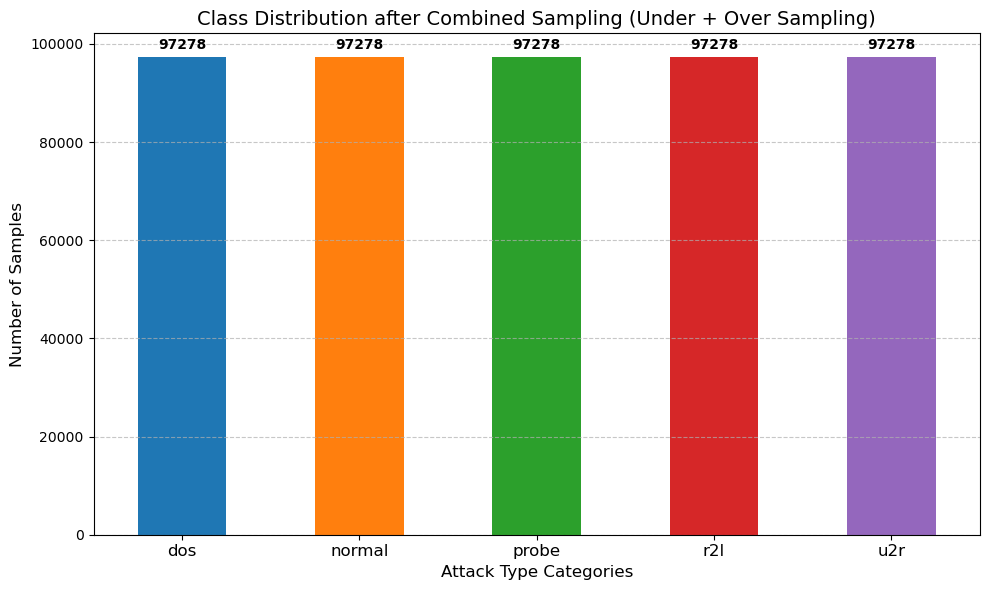

In [8]:
# Step 1: 欠采样多数类（例如：Dos 类别）
under_sampler = RandomUnderSampler(sampling_strategy={0: 50000}, random_state=42)  # 将 DoS 类样本降到 50,000
X_resampled, Y_resampled = under_sampler.fit_resample(X, Y)

# Step 2: 使用 SMOTE 对少数类过采样
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 自动将少数类上采样至平衡
X_balanced, Y_balanced = smote.fit_resample(X_resampled, Y_resampled)

# 查看采样后的类别分布
balanced_data = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), 
                           pd.DataFrame(Y_balanced, columns=['attack_type_digit'])], axis=1)
print("采样后的类别分布：")
print(balanced_data['attack_type_digit'].value_counts())

# 保存混合采样后的数据集
balanced_data.to_csv('./dataset/combined_sampled_dataset.csv', index=False)
print("混合采样后的数据集已保存为 'combined_sampled_dataset.csv'")

# 绘制柱状图
plt.figure(figsize=(10, 6))
bars = balanced_data['attack_type_digit'].value_counts().sort_index().plot(
    kind='bar', 
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
)

# 设置 X 轴标签
plt.xticks(range(5), ['dos', 'normal', 'probe', 'r2l', 'u2r'], rotation=0, fontsize=12)

# 添加数值标签
for i, value in enumerate(balanced_data['attack_type_digit'].value_counts().sort_index()):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

# 添加标题和坐标轴标签
plt.title("Class Distribution after Combined Sampling (Under + Over Sampling)", fontsize=14)
plt.xlabel("Attack Type Categories", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)

# 显示网格线（可选）
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.tight_layout()
plt.show()

混合采样后的数据集已保存为 'smote_enn_sampled_dataset.csv'


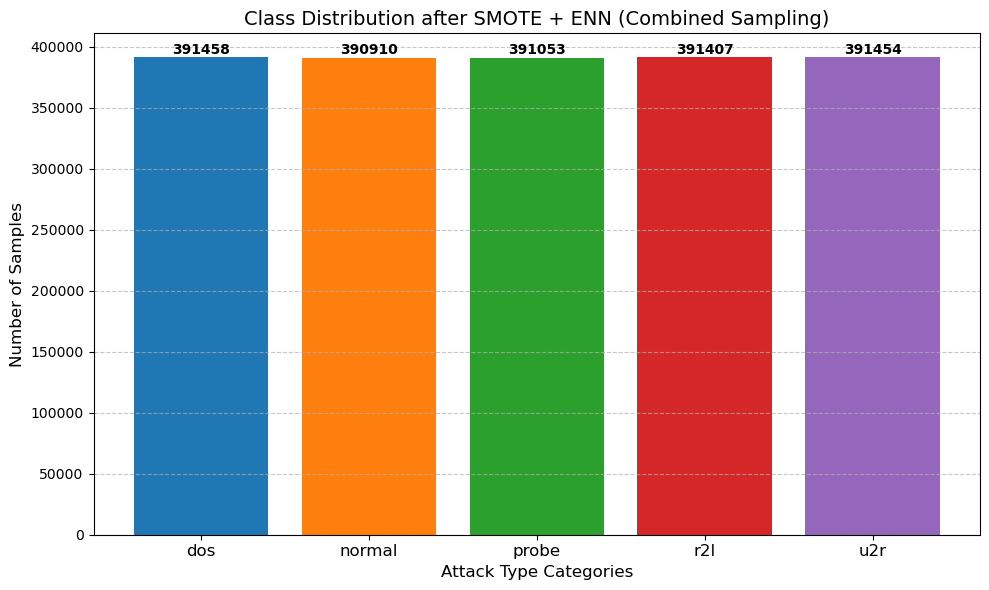

In [11]:
# Step 1: 生成混合采样数据集（SMOTE + ENN）
# 设置最近邻估计器，并将 n_jobs 设置为 -1（使用所有可用 CPU 核心）
from imblearn.under_sampling import EditedNearestNeighbours
nn = EditedNearestNeighbours(n_jobs=-1)

smote_enn = SMOTEENN(random_state=42,enn=nn)
X_smote_enn, Y_smote_enn = smote_enn.fit_resample(X, Y)

# 将平衡后的数据集合并
balanced_smote_enn = pd.concat([pd.DataFrame(X_smote_enn, columns=X.columns), 
                                pd.DataFrame(Y_smote_enn, columns=['attack_type_digit'])], axis=1)

# 保存数据集（可选）
balanced_smote_enn.to_csv('./dataset/smote_enn_sampled_dataset.csv', index=False)
print("混合采样后的数据集已保存为 'smote_enn_sampled_dataset.csv'")

# Step 2: 可视化混合采样后的类别分布
plt.figure(figsize=(10, 6))

# 统计每个类别的数量
class_counts = Y_smote_enn.value_counts().sort_index()

# 绘制柱状图
bars = plt.bar(range(len(class_counts)), class_counts, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# 添加数值标签
for i, value in enumerate(class_counts):
    plt.text(i, value + 500, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

# 设置 X 轴标签和标题
plt.xticks(range(len(class_counts)), ['dos', 'normal', 'probe', 'r2l', 'u2r'], fontsize=12)
plt.title("Class Distribution after SMOTE + ENN (Combined Sampling)", fontsize=14)
plt.xlabel("Attack Type Categories", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)

# 显示网格线（可选）
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.tight_layout()
plt.show()